<a href="https://colab.research.google.com/github/thomaschen01/CNN-Assignment-2025/blob/main/ACS111106_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
      for gpu in gpus:
          tf.config.experimental.set_memory_growth(gpu, True)
      logical_gpus = tf.config.experimental.list_logical_devices('GPU')
else:
    print("No GPU detected, running on CPU")

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
    layers.RandomTranslation(0.05, 0.05),
])

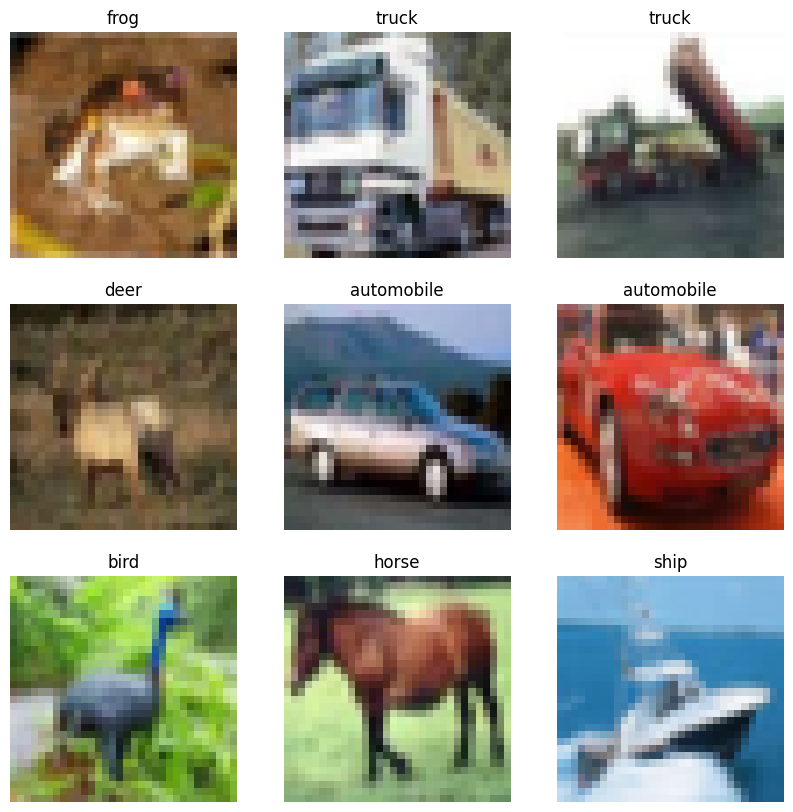

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
model = models.Sequential([
     data_augmentation,
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.GlobalAveragePooling2D(),

    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.6,
    patience=2,
    min_lr=0.00005,
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
    history = model.fit(train_images, train_labels, epochs=30,
                        validation_data=(test_images, test_labels),
                        callbacks=[reduce_lr, early_stopping],
                        batch_size=32,
                        verbose=1)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 25ms/step - accuracy: 0.3003 - loss: 2.1103 - val_accuracy: 0.4008 - val_loss: 2.1334 - learning_rate: 5.0000e-04
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 23ms/step - accuracy: 0.5283 - loss: 1.3128 - val_accuracy: 0.6248 - val_loss: 1.0623 - learning_rate: 5.0000e-04
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.6355 - loss: 1.0411 - val_accuracy: 0.6629 - val_loss: 0.9734 - learning_rate: 5.0000e-04
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.6905 - loss: 0.8879 - val_accuracy: 0.6641 - val_loss: 0.9772 - learning_rate: 5.0000e-04
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.7259 - loss: 0.7969 - val_accuracy: 0.7276 - val_loss: 0.8209 - learning_rate: 5.0000e-04
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 23ms/step - accuracy: 0.7494 - loss: 0.7209 - val_accuracy: 0.7195 - val_loss: 0.8447 - learning_rate: 5.0000e-04
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 1s - 5ms/step - accuracy: 0.8792 - loss: 0.3635

Test accuracy: 0.8792


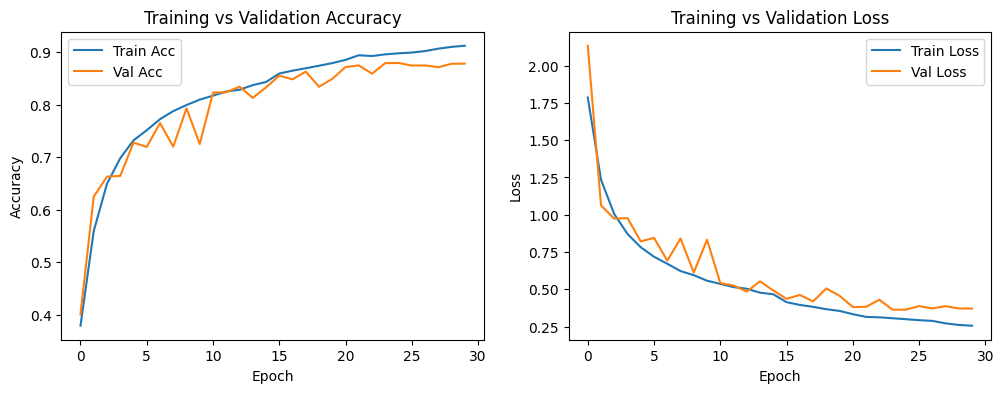

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


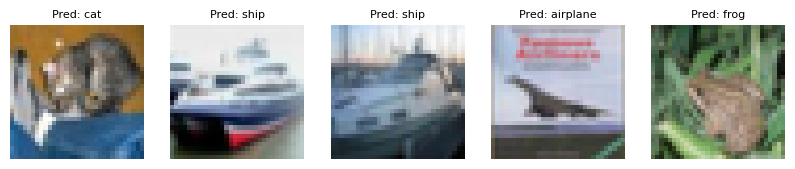

In [ ]:
predictions = model.predict(test_images[:5])
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}",
              fontsize=8)
    plt.axis('off')
plt.show()

In [ ]:
try:
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    performance_text = f"""Model Performance Summary:
Test Accuracy: {test_acc:.4f}
Test Loss: {test_loss:.4f}
Final Training Accuracy: {final_train_acc:.4f}
Final Validation Accuracy: {final_val_acc:.4f}
Final Training Loss: {final_train_loss:.4f}
Final Validation Loss: {final_val_loss:.4f}
Training Epochs: {len(history.history['accuracy'])}
Model Parameters: {model.count_params()}"""
    with open('model_accuracy.txt', 'w') as f:
        f.write(performance_text)
    print("Model performance saved to model_accuracy.txt")
    print(performance_text)
except Exception as e:
    print(f"Error saving model performance: {e}")
    # Create a basic file even if there's an error
    with open('model_accuracy.txt', 'w') as f:
        f.write(f"Model execution completed with errors: {e}")

Model performance saved to model_accuracy.txt
Model Performance Summary:
Test Accuracy: 0.8792
Test Loss: 0.3635
Final Training Accuracy: 0.9121
Final Validation Accuracy: 0.8779
Final Training Loss: 0.2555
Final Validation Loss: 0.3706
Training Epochs: 30
Model Parameters: 1417546


In [14]:
from IPython.display import Markdown, display

display(Markdown("""
## Task 5: Report
本研究使用 卷積神經網路（CNN） 處理 CIFAR-10 圖像分類任務，整體方法設計涵蓋資料處理、模型架構、訓練策略、正則化技巧、資料增強與性能監控。以下詳細說明各個方法的選擇原因：
1. 資料預處理與增強（Data Preprocessing & Augmentation）
標準化（Normalization）
將影像像素值從 [0, 255] 縮放至 [0, 1]：
加速梯度下降過程
減少訓練不穩定與梯度爆炸風險

資料增強（Data Augmentation）：
製造更多樣本以提高泛化能力
模擬真實世界圖像變化（例如拍攝角度、位移）

2. 模型架構設計（Model Architecture）
本模型為深層 CNN 架構，採用多層卷積堆疊與正則化模組。

卷積層（Conv2D）
使用 3x3 的小卷積核並設定 padding='same'：
小卷積核可更精細地捕捉特徵
多層堆疊學習不同層級的圖像表示

批次正規化（BatchNormalization）
每個卷積層後使用 BN：
穩定學習過程
加快收斂，降低對初始權重的敏感性

池化層（MaxPooling2D）
降低特徵圖尺寸與參數量
增加模型空間不變性（例如位移）

Dropout 正則化
隨機關閉神經元，減少過擬合風險
提升模型泛化能力

全域平均池化（GlobalAveragePooling2D）
取代 Flatten 降低參數數量
保留空間結構資訊

全連接層（Dense）與 Softmax 輸出
負責分類邏輯
使用 Softmax 輸出各類別機率

3. 優化器與損失函數（Optimizer & Loss）
使用 Adam 優化器
自動調整學習率
適合非平穩、稀疏梯度場

使用 Sparse Categorical Crossentropy 損失
適用於類別為整數形式的多分類問題
避免使用 One-Hot 編碼

4. 回調函數（Callbacks）
ReduceLROnPlateau
當驗證準確率停滯時自動降低學習率
避免卡在 local minima

EarlyStopping
若驗證準確率長時間未改善即終止訓練
可避免過擬合並節省訓練時間

5. 訓練與評估策略（Training & Evaluation）
訓練 30 個 epochs，batch size 為 32。
使用 GPU 計算，加速訓練。
透過訓練與驗證損失曲線觀察模型過擬合與學習趨勢。
最終以測試集評估模型泛化能力。

6. 成效總結（Performance Summary）
Final Training Accuracy	91.21%
Final Validation Accuracy	87.79%
Test Accuracy	87.92%
Test Loss	0.3635
模型參數總數	1,417,546

本方法整合了現代 CNN 設計、正則化技術、資料擴增與學習率調控技巧，有效提升了 CIFAR-10 分類效能至近 88% 的準確率。其架構通用性與可擴展性強，適合應用於更大規模之影像分類任務或進行遷移學習。

"""))


## Task 5: Report
本研究使用 卷積神經網路（CNN） 處理 CIFAR-10 圖像分類任務，整體方法設計涵蓋資料處理、模型架構、訓練策略、正則化技巧、資料增強與性能監控。以下詳細說明各個方法的選擇原因：
1. 資料預處理與增強（Data Preprocessing & Augmentation）
標準化（Normalization）
將影像像素值從 [0, 255] 縮放至 [0, 1]：
加速梯度下降過程
減少訓練不穩定與梯度爆炸風險

資料增強（Data Augmentation）：
製造更多樣本以提高泛化能力
模擬真實世界圖像變化（例如拍攝角度、位移）

2. 模型架構設計（Model Architecture）
本模型為深層 CNN 架構，採用多層卷積堆疊與正則化模組。

卷積層（Conv2D）
使用 3x3 的小卷積核並設定 padding='same'：
小卷積核可更精細地捕捉特徵
多層堆疊學習不同層級的圖像表示

批次正規化（BatchNormalization）
每個卷積層後使用 BN：
穩定學習過程
加快收斂，降低對初始權重的敏感性

池化層（MaxPooling2D）
降低特徵圖尺寸與參數量
增加模型空間不變性（例如位移）

Dropout 正則化
隨機關閉神經元，減少過擬合風險
提升模型泛化能力

全域平均池化（GlobalAveragePooling2D）
取代 Flatten 降低參數數量
保留空間結構資訊

全連接層（Dense）與 Softmax 輸出
負責分類邏輯
使用 Softmax 輸出各類別機率

3. 優化器與損失函數（Optimizer & Loss）
使用 Adam 優化器
自動調整學習率
適合非平穩、稀疏梯度場

使用 Sparse Categorical Crossentropy 損失
適用於類別為整數形式的多分類問題
避免使用 One-Hot 編碼

4. 回調函數（Callbacks）
ReduceLROnPlateau
當驗證準確率停滯時自動降低學習率
避免卡在 local minima

EarlyStopping
若驗證準確率長時間未改善即終止訓練
可避免過擬合並節省訓練時間

5. 訓練與評估策略（Training & Evaluation）
訓練 30 個 epochs，batch size 為 32。
使用 GPU 計算，加速訓練。
透過訓練與驗證損失曲線觀察模型過擬合與學習趨勢。
最終以測試集評估模型泛化能力。

6. 成效總結（Performance Summary）
Final Training Accuracy	91.21%
Final Validation Accuracy	87.79%
Test Accuracy	87.92%
Test Loss	0.3635
模型參數總數	1,417,546

本方法整合了現代 CNN 設計、正則化技術、資料擴增與學習率調控技巧，有效提升了 CIFAR-10 分類效能至近 88% 的準確率。其架構通用性與可擴展性強，適合應用於更大規模之影像分類任務或進行遷移學習。



"Conclusion"

---


"Task 5:" Report

---

本研究使用 卷積神經網路（CNN） 處理 CIFAR-10 圖像分類任務，整體方法設計涵蓋資料處理、模型架構、訓練策略、正則化技巧、資料增強與性能監控。以下詳細說明各個方法的選擇原因：
1. 資料預處理與增強（Data Preprocessing & Augmentation）
標準化（Normalization）
將影像像素值從 [0, 255] 縮放至 [0, 1]：
加速梯度下降過程
減少訓練不穩定與梯度爆炸風險

資料增強（Data Augmentation）：
製造更多樣本以提高泛化能力
模擬真實世界圖像變化（例如拍攝角度、位移）

2. 模型架構設計（Model Architecture）
本模型為深層 CNN 架構，採用多層卷積堆疊與正則化模組。

卷積層（Conv2D）
使用 3x3 的小卷積核並設定 padding='same'：
小卷積核可更精細地捕捉特徵
多層堆疊學習不同層級的圖像表示

批次正規化（BatchNormalization）
每個卷積層後使用 BN：
穩定學習過程
加快收斂，降低對初始權重的敏感性

池化層（MaxPooling2D）
降低特徵圖尺寸與參數量
增加模型空間不變性（例如位移）

Dropout 正則化
隨機關閉神經元，減少過擬合風險
提升模型泛化能力

全域平均池化（GlobalAveragePooling2D）
取代 Flatten 降低參數數量
保留空間結構資訊

全連接層（Dense）與 Softmax 輸出
負責分類邏輯
使用 Softmax 輸出各類別機率

3. 優化器與損失函數（Optimizer & Loss）
使用 Adam 優化器
自動調整學習率
適合非平穩、稀疏梯度場

使用 Sparse Categorical Crossentropy 損失
適用於類別為整數形式的多分類問題
避免使用 One-Hot 編碼

4. 回調函數（Callbacks）
ReduceLROnPlateau
當驗證準確率停滯時自動降低學習率
避免卡在 local minima

EarlyStopping
若驗證準確率長時間未改善即終止訓練
可避免過擬合並節省訓練時間

5. 訓練與評估策略（Training & Evaluation）
訓練 30 個 epochs，batch size 為 32。
使用 GPU 計算，加速訓練。
透過訓練與驗證損失曲線觀察模型過擬合與學習趨勢。
最終以測試集評估模型泛化能力。

6. 成效總結（Performance Summary）
Final Training Accuracy	91.21%
Final Validation Accuracy	87.79%
Test Accuracy	87.92%
Test Loss	0.3635
模型參數總數	1,417,546

本方法整合了現代 CNN 設計、正則化技術、資料擴增與學習率調控技巧，有效提升了 CIFAR-10 分類效能至近 88% 的準確率。其架構通用性與可擴展性強，適合應用於更大規模之影像分類任務或進行遷移學習。